# Lab 9: Images: Rotations, Fourier Transforms & the Value of Phase

#### Goal of this part

In today's lab, you will learn how to:

1. rotate images
2. compute the 2D FT of an image by calling the FFT algorithm
3. compute the inverse FT by calling the iFFT algorithm
4. plot the magnitude of the FT of an image

You will also see a demonstration of why the phase information of the fourier transform is important. Specifically, you will learn that the phase of the FT carries most of the information about the image!

## 1.1 Image transformations in the original domain: Rotations

In this section we will think through how to manipulate images in simple ways, such as how to rotate and take the transpose of an image. Consider the following matrix. How can we rotate it clockwise by 90 degrees?

In [1]:
import numpy as np
mat = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(mat)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


<font color='red'>**Exercise 1.1.1**</font> Finish the function below, which rotates a matrix by 90 degrees clockwise.

In [2]:
def rotate_mtx_90_deg(mtx_in):
    
    n_rows = mtx_in.shape[0]
    n_cols = mtx_in.shape[1]
    
    # make sure the matrix is square
    assert n_rows == n_cols, "Input matrix is not square"
    
    mtx_out = np.zeros((mtx_in.shape))
    for i in range(n_cols):
        for j in range(n_rows):
            mtx_out[j,n_rows-i-1] = mtx_in[i,j]

    return mtx_out

In [3]:
rotate_mtx_90_deg(mat)

array([[7., 4., 1.],
       [8., 5., 2.],
       [9., 6., 3.]])

Let's see this applied to an image.

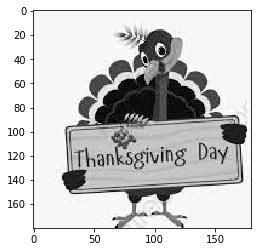

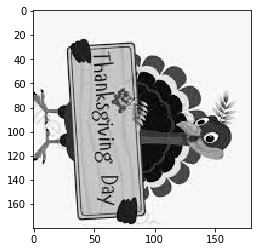

In [4]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = mpimg.imread('pic1.jfif') 
image = image[0:180,30:210,1]

# Original image
plt.figure()
plt.imshow(image,cmap='gray')

# Rotated image
plt.figure()
plt.imshow(rotate_mtx_90_deg(image),cmap='gray')

<font color='red'>**Exercise 1.1.2**</font> Below, display the image rotated clockwise by 270 degrees.

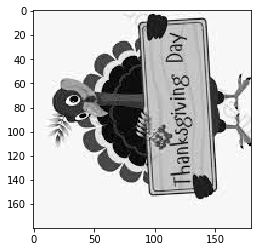

In [5]:
Image90 = rotate_mtx_90_deg(image)
Image180 = rotate_mtx_90_deg(Image90)
Image270 = rotate_mtx_90_deg(Image180)

plt.figure()
plt.imshow(Image270, cmap='gray')

<font color='red'>**Exercise 1.1.3**</font> Another basic image manipulation is an image <i>transpose</i>. Look up how to take the transpose of a 2D numpy array, and in the cell below display the transpose of the image.

In [6]:
TransposedImage = np.transpose(image)

How is the transposed image different from the image that has been rotated clockwise by 270 degrees?

The image was diagnoly flipped, rotating by 270 degrees clockwise and flip it upside down will have the same effect


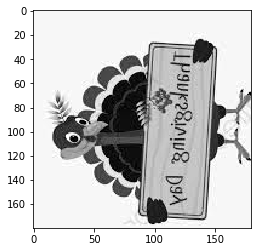

In [7]:
plt.figure()
plt.imshow(TransposedImage, cmap='gray')
print("The image was diagnoly flipped, rotating by 270 degrees clockwise and flip it upside down will have the same effect")

<font color='red'>**Exercise 1.1.4**</font> Below, write a function that takes in a matrix and outputs a matrix that is twice as big in each dimension, where each quarter of the new image has 1) the original matrix, 2) the matrix rotated by 90 degrees, 3) the matrix rotated by 270 degrees, and 4) the transpose of the matrix. 

In [8]:
def image_tiling(image):
    
    n_rows = 2 * image.shape[0]
    n_cols = 2 * image.shape[1]
    
    # make sure the matrix is square
    assert n_rows == n_cols, "Input matrix is not square"
    
    image_new = np.zeros((n_rows, n_cols))
    for i in range(n_cols):
        for j in range(n_rows):
            image_new[i,j] = image[int(i/2),int(j/2)]
    return image_new

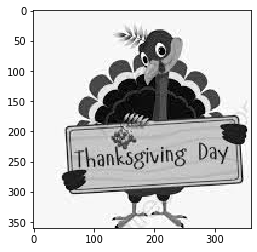

In [9]:
plt.imshow(image_tiling(image),cmap='gray')

We've been able to rotate a matrix manually by calling a function which rotates it by 90 degrees. We now want to come up with a function that rotates a matrix some number of times. The input to the function should be the matrix to be rotated and how it should be rotated (in degrees). The function will then rotate it to the nearest multiple of 90 degrees.

In [10]:
def rotate_mtx_clockwise(mtx_in, deg):
    
    if deg < 0:
        return mtx_in
    
    n_rotations = int(deg/90)
    
    mtx_out = mtx_in
    for i in range(n_rotations):
        mtx_out = rotate_mtx_90_deg(mtx_out)
        
    return mtx_out

Try calling your function to rotate the matrix by 100 degrees, 200 degrees, and 300 degrees. What do you expect the output should be? Does the output match your expectations?

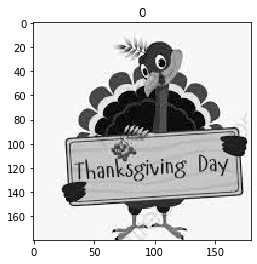

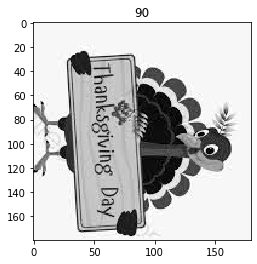

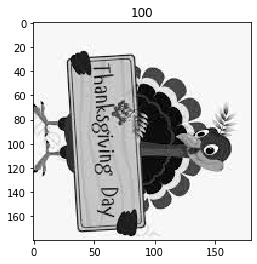

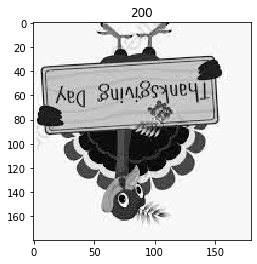

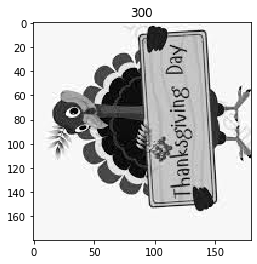

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = mpimg.imread('pic1.jfif') 
image = image[0:180,30:210,1]
plt.title("0")
plt.imshow(image,cmap='gray')

plt.figure()
plt.title("90")
plt.imshow(rotate_mtx_clockwise(image, 90),cmap='gray')

plt.figure()
plt.title("100")
plt.imshow(rotate_mtx_clockwise(image, 100),cmap='gray')

plt.figure()
plt.title("200")
plt.imshow(rotate_mtx_clockwise(image, 200),cmap='gray')

plt.figure()
plt.title("300")
plt.imshow(rotate_mtx_clockwise(image, 300),cmap='gray')

Try rotating a matrix by 10^12 degrees. Does this work? If not, how could you write your function to more efficiently choose how many times to rotate the matrix?

In [12]:
plt.figure()
plt.imshow(rotate_mtx_clockwise(image, 10**12),cmap='gray')

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

If your code above took a long time to run, try reimplenting the function in a more efficient way.

In [13]:
# More efficient implementation
def rotate_mtx_efficient(mtx_in, deg):
    
    if deg < 0:
        return mtx_in
    
    n_rotations = int((deg/90)%4)
    
    mtx_out = mtx_in
    for i in range(n_rotations):
        mtx_out = rotate_mtx_90_deg(mtx_out)
        
    return mtx_out

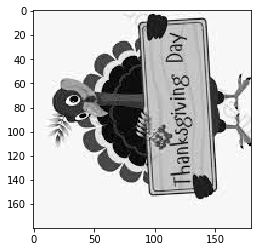

In [14]:
plt.figure()
plt.imshow(rotate_mtx_efficient(image, 10**12),cmap='gray')

## 1.2 Fourier Transform of 2D signals

In the lectures, we talked about the Fourier/frequency representation of 1D signals. Specifically, we introduced the Fourier transform as a mapping from the time-domain to the frequency domain, where the the values of the Fourier transform are informative of the degree with which the corresponding frequency is "present" in the signal. At its heart, the Fourier transform (FT) of a time-varying signal is a decomposition into simple sinusoids of different frequencies. The output of the FT tells us which frequencies we need to compose our signal.


`Can we extend these ideas to 2D signals? Is there a Fourier transform of a spatially-varying 2D signal? If so, what does it mean and how to compute it?`

It turns out that the very same ideas that we introduced for 1D time signals extend naturally to 2D spatially-varying signals. First, we now need a decomposition into spatially variying sinusoids, rather than time-varying ones. Second, we need sinusoids that vary in two-dimensions. Such sinusoids can oscilate with different frequencies just like classical time-varying 1D sinusoids. Only now, every such sinusoid is specified by **two frequencies**. This is consistent with the fact that a 2D signal is specified by two independet variables!

In this course we will avoid formalizing this extension further. Instead, we will follow a programming-based approach. We will learn how to compute the FT of a 2D signal (specifically, an image) and how to plot its magnitude and its phase. In the coming labs, we will further see how to use the information of the FT to process images.

Image processing techniques that are based on processing the FT of the image are called **spectral techniques** and are very useful and popular!

#### Read the image in a 2D array

Let us first load the image and store it in a 2D array.

In [15]:
# importing libraries for image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

type of image  <class 'numpy.ndarray'>
Dimension of Image  (512, 512)
[[180 201 201 ... 106  95  94]
 [175 199 199 ...  90  99  94]
 [172 196 193 ...  83 100  96]
 ...
 [ 98  95  97 ... 114 116 114]
 [ 96  97  98 ... 112 115 114]
 [ 93  97  97 ... 109 109 107]]


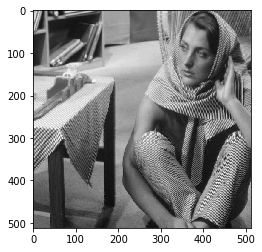

In [16]:
# Read the image (Image should be in same folder as jupyter lab file, otherwise define a proper path to image)
img = mpimg.imread('test_image.jpg') 

# check the type of image
print("type of image ", type(img))

# image is a 2D array

# Check the Dimension of Image
print("Dimension of Image ", img.shape)

rows = img.shape[0]
cols = img.shape[1]
# Total No of pixels in the image is 512 X 512

#Check the Values in the image
print(img)


#plot the image
plt.imshow(img, cmap="gray")

#### 2D Fourier Transform of Image
Computing the FT (specifically the Fast Fourier Transform) of a 2D array is very easy in Python and is done as follows:

In [17]:
import numpy as np

FT_img = np.fft.fft2(img)

<font color='red'>**Exercise 1.2.1**</font> Print the output of FT_img to see the content of the FT. Observe that the output is a 2D array (just like the input!). What is the dimension of the array? Are the entries real or complex?

In [18]:
print(type(FT_img), end = "\n\n---------------\n")    # print the type of FT_img
print(FT_img.shape, end = "\n\n---------------\n")       # print its size
print(FT_img, end = "\n\n---------------\n")          # print its values 

<class 'numpy.ndarray'>

---------------
(512, 512)

---------------
[[30773716.              +0.j         -1635881.52814045 -372978.63947264j
   1705791.47420341 -393872.79461681j ...
    162149.14794291 -211287.38729497j  1705791.47420341 +393872.79461681j
  -1635881.52814045 +372978.63947264j]
 [-1965690.65595536-3213534.44330876j -2010424.97153977+2500354.49628939j
  -1444045.81899304 +350669.07904033j ...
    882361.32828593 -705541.57671542j  -551250.30501679 -597511.38578556j
   -133404.71407643 -266237.41405963j]
 [ -398493.5112166  +990710.60778142j  1207498.32043378 +635093.73237648j
    327455.75137714 -860417.10872256j ...
     89592.706793   +559212.63509031j  -132804.75547397 -960790.56857338j
    642599.17166411 +116266.54863986j]
 ...
 [  -77127.53398743  -91312.05052342j  -532844.07867579 +198564.21560351j
    378045.82281314 -311084.97919889j ...
   1459197.36323365  -93470.40254699j   487938.31029356 -122056.85916023j
    103382.47131944 +289595.77780842j]
 [ -398493

Just as we did in the case of 1D signals, it is convenient to "center" the FT such that the DC component is at the center. We do this below.

In [19]:
'''
Now once you got the result, zero frequency component (DC component) will be at top left corner. 
If you want to bring it to center, you need to shift the result by \frac{N}{2} in both the directions. 
This is simply done by the function, np.fft.fftshift(). (It is more easier to analyze). 
'''
FT_img_shift = np.fft.fftshift(FT_img)

Try to plot the **magnitude** of the 2D spectrum

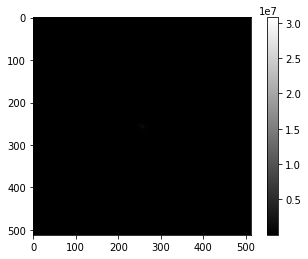

In [20]:
plt.imshow(abs(FT_img_shift), cmap = "gray")
plt.colorbar()

Why is it hard to see anything? What are the min and maximum values of the magnitude?

In [21]:
FT_img_abs = abs(FT_img_shift)
print('Minimum value of Fourier magnitude is:',np.min(FT_img_abs))
print('Maximum value of Fourier magnitude is:',np.max(FT_img_abs))

Minimum value of Fourier magnitude is: 11.069131790558062
Maximum value of Fourier magnitude is: 30773716.0


To circumvent the issue above, we will instead plot the magnitude values in decibel (dB) as follows.

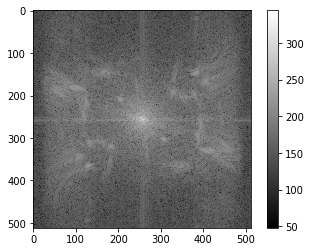

In [22]:
magnitude_spectrum = 20*np.log(np.abs(FT_img_shift))   # magnitude of spectrum in dB

plt.imshow(magnitude_spectrum, cmap = "gray")
plt.colorbar()

We can now clearly see some pattern on the magnitude of the Fourier transform. Specifically, observe that the larger values (whiter regions) are located at the center of image, which corresponds to low frequencies. In other words, the low-frequencies of this image have high energy.

Just like the FT of an 1D time-signal is an **invertible** transformation, the same is true for the FT of a 2D signal. Namely, we can go back and forth between the original image and its FT!

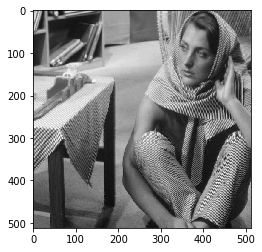

In [23]:
# Reconstructing Image using both Magnitude and Phase Information
img_back = np.fft.ifft2(FT_img_shift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap="gray")

Remember: There is information both in the magnitude and in the phase of the FT! Here is what happens if we ignore the phase! Not good, eh? :)

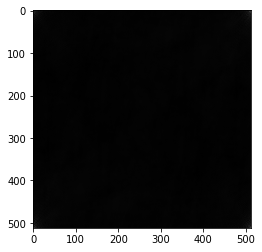

In [24]:
# Reconstructing Image just using Magnitude Information
img_back_mag = np.fft.ifft2(np.abs(FT_img_shift))
img_back_mag = np.abs(img_back_mag)
plt.imshow(img_back_mag, cmap = "gray")

Next, let us convert the grayscale image to a binary image and plot the Fourier transform of the binary image. Recall the following piece of code from lab 5.

(512, 512)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


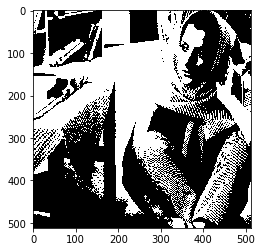

In [25]:
# Convert in binary image 

# pixel_value > 128 then it is 1, otherwise it is zero

# Defining and Intializing a New 2D array 
img_binary = np.zeros((rows,cols), dtype = int)
print(img_binary.shape)
print(img_binary)
threshold = 128
for i in range(rows):
    for j in range(cols):
        if img[i][j] >= 128:
            img_binary[i][j] = 1
        else:
            img_binary[i][j] = 0
            
#print(img_new)
plt.imshow(img_binary, cmap="gray")

<font color='red'>**Exercise 1.2.2**</font> Compute the Fourier transform of the binary image `img_binary`, shift the content as above and plot the magnitude of the fourier transform in dB.

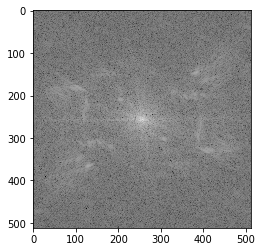

In [26]:
f_1 = np.fft.fft2(img_binary)           # compute the FT of the binary image
fshift_1 = np.fft.fftshift(f_1)         # shift the fourier content so that the (0,0) frequency is at the center of the array

magnitude_spectrum_1 = 20*np.log(np.abs(fshift_1))  # comvert the magnitude to dB

plt.imshow(magnitude_spectrum_1, cmap ="gray")  # plot the magnitude

Observe that the magnitude content is different to that of the grayscale image.

<font color='red'>**Exercise 1.2.3**</font> Write a function that takes as argument an image and returns an array of the same size with entries equal to the shifted coefficients of the Fourier transform.

In [27]:
def my_img_fft(img_in):
    fft_img = np.fft.fft2(img_in)          
    shift_fft_img = np.fft.fftshift(fft_img)
    
    return shift_fft_img

## 1.3 Phase is important

In this part, we will demonstrate that the phase information of the Fourier Transform is important, especially so for images! 

To demonstrate this, we will perform the following experiment. We will load two images, compute their FTs and swap their phases. Then, we will use the inverse Fourier transform to map the FTs with swaped phases back to the original domain. We will plot the new images and see that they are highly distorted!

To begin with, go through and execute the following piece of code. Make sure that you understand how to go back and forth from the original image domain to the fourier transform domain. The FFT transform is invertible (i.e., there is no loss of information).

Text(0.5, 1.0, 'Cat')

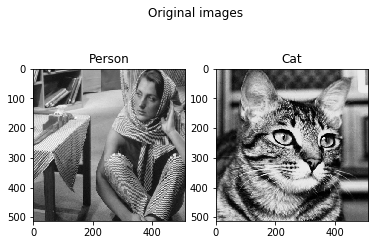

In [28]:
# load the two images
img1 = mpimg.imread('test_image.jpg') 
img2 = mpimg.imread('cat.jpg') 

# plot the two images
fig = plt.figure()
fig.suptitle("Original images")

fig.add_subplot(1,2,1)
plt.imshow(abs(img1), cmap="gray")
plt.title("Person")

fig.add_subplot(1,2,2)
plt.imshow(abs(img2), cmap="gray")
plt.title("Cat")

Use your function `my_img_fft` to compute the Fourier transform of the two images

In [29]:
# compute Fourier transforms of the images
FT1 = my_img_fft(img1)
FT2 = my_img_fft(img2)

Text(0.5, 1.0, 'Cat')

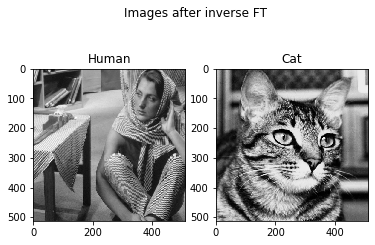

In [30]:
# compute the *inverse* Fourier transforms of the images
img1_new = np.fft.ifft2(FT1)
img2_new = np.fft.ifft2(FT2)

fig = plt.figure()
fig.suptitle("Images after inverse FT")

fig.add_subplot(1,2,1)
plt.imshow(abs(img1_new), cmap="gray")
plt.title("Human")

fig.add_subplot(1,2,2)
plt.imshow(abs(img2_new), cmap="gray")
plt.title("Cat")

Next, we want to swap the phase information between the FTs of two images, i.e., between  the arrays FT1 and FT2. Follow the steps below.

<font color='red'>**Exercise 1.3.1**</font> Write a function `swap_phase` that takes as argument two complex numbers z1 and z2 and returns complex numbers z3 and z4, such that 
$$
|z_3| = |z_1|,~~\rm{arg}(z_3) = \rm{arg}(z_2),
$$
and 
$$
|z_4| = |z_2|,~~\rm{arg}(z_4) = \rm{arg}(z_1).
$$

You may need to use the following function that converts polar to cartesian coordinates.

In [31]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    z = x + y*1j
    return z

Test the function works properly:

In [32]:
print(pol2cart(1,0))
print(pol2cart(1,np.pi/2))
print(pol2cart(1,-np.pi/2))
print(pol2cart(1,-np.pi))
print(pol2cart(1,-np.pi/4))

(1+0j)
(6.123233995736766e-17+1j)
(6.123233995736766e-17-1j)
(-1-1.2246467991473532e-16j)
(0.7071067811865476-0.7071067811865475j)


Now use the function `pol2cart` to define the function `swap_phase`.

In [33]:
def swap_phase(z1,z2):
    z3 = pol2cart(abs(z1),np.angle(z2))
    z4 = pol2cart(abs(z2),np.angle(z1))
    
    return (z3,z4)

Make sure that your function works properly:

In [34]:
z1 = 1 + 1j
z2 = 1 - 1j
print(swap_phase(z1,z2))

((1.0000000000000002-1j), (1.0000000000000002+1j))


Also, observe that the function works properly if it is passed as arguments arrays rather than scalars.

In [35]:
z1 = np.array([1 + 1j, 1-1j])
z2 = np.array([1 - 1j, 1+1j])

(z3,z4) = swap_phase(z1,z2)

print(z3)
print(z4)

[1.-1.j 1.+1.j]
[1.+1.j 1.-1.j]


<font color='red'>**Exercise 1.3.2**</font> Use the function that you defined above to swap the phases of FT1 and FT2. Then, call the inverse fourier transform on the new Fourier transform arrays. Plot the new images. What do you observe?

Text(0.5, 1.0, 'Cat')

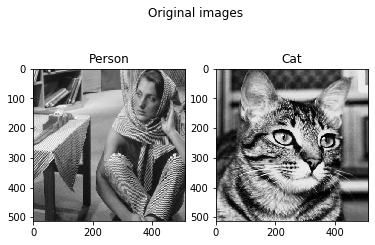

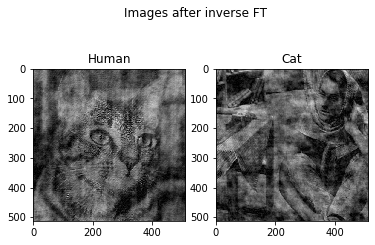

In [36]:
# load the two images
FT1 = my_img_fft(img1)
FT2 = my_img_fft(img2)

img1_new = np.fft.ifft2(FT1)
img2_new = np.fft.ifft2(FT2)

# plot the two images
fig = plt.figure()
fig.suptitle("Original images")

fig.add_subplot(1,2,1)
plt.imshow(abs(img1_new), cmap="gray")
plt.title("Person")

fig.add_subplot(1,2,2)
plt.imshow(abs(img2_new), cmap="gray")
plt.title("Cat")

# ************************** #
# swap phases
# ************************** #
(FT1_new,FT2_new) = swap_phase(FT1,FT2)

# compute the *inverse* Fourier transforms of FT1_new and FT2_new
img1_new1 = np.fft.ifft2(FT1_new)
img2_new1 = np.fft.ifft2(FT2_new)

fig = plt.figure()
fig.suptitle("Images after inverse FT")

fig.add_subplot(1,2,1)
plt.imshow(abs(img1_new1), cmap="gray")
plt.title("Human")

fig.add_subplot(1,2,2)
plt.imshow(abs(img2_new1), cmap="gray")
plt.title("Cat")

In [37]:
print("They sort of blended together")

They sort of blended together
